In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import yfinance as yf
import vectorbt as vbt
import mplfinance as mpf

In [2]:
data = pd.DataFrame()
data = data.ta.ticker('EURUSD=x', period = '5d', interval = '15m')

In [3]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-10-11 03:15:00+01:00,1.157943,1.158212,1.157407,1.157407,0,0,0
2021-10-11 03:30:00+01:00,1.157541,1.157675,1.157407,1.157541,0,0,0
2021-10-11 04:00:00+01:00,1.157407,1.157943,1.157274,1.157274,0,0,0
2021-10-11 04:15:00+01:00,1.157274,1.157675,1.157274,1.157541,0,0,0
2021-10-11 04:22:05+01:00,1.157541,1.157541,1.157541,1.157541,0,0,0


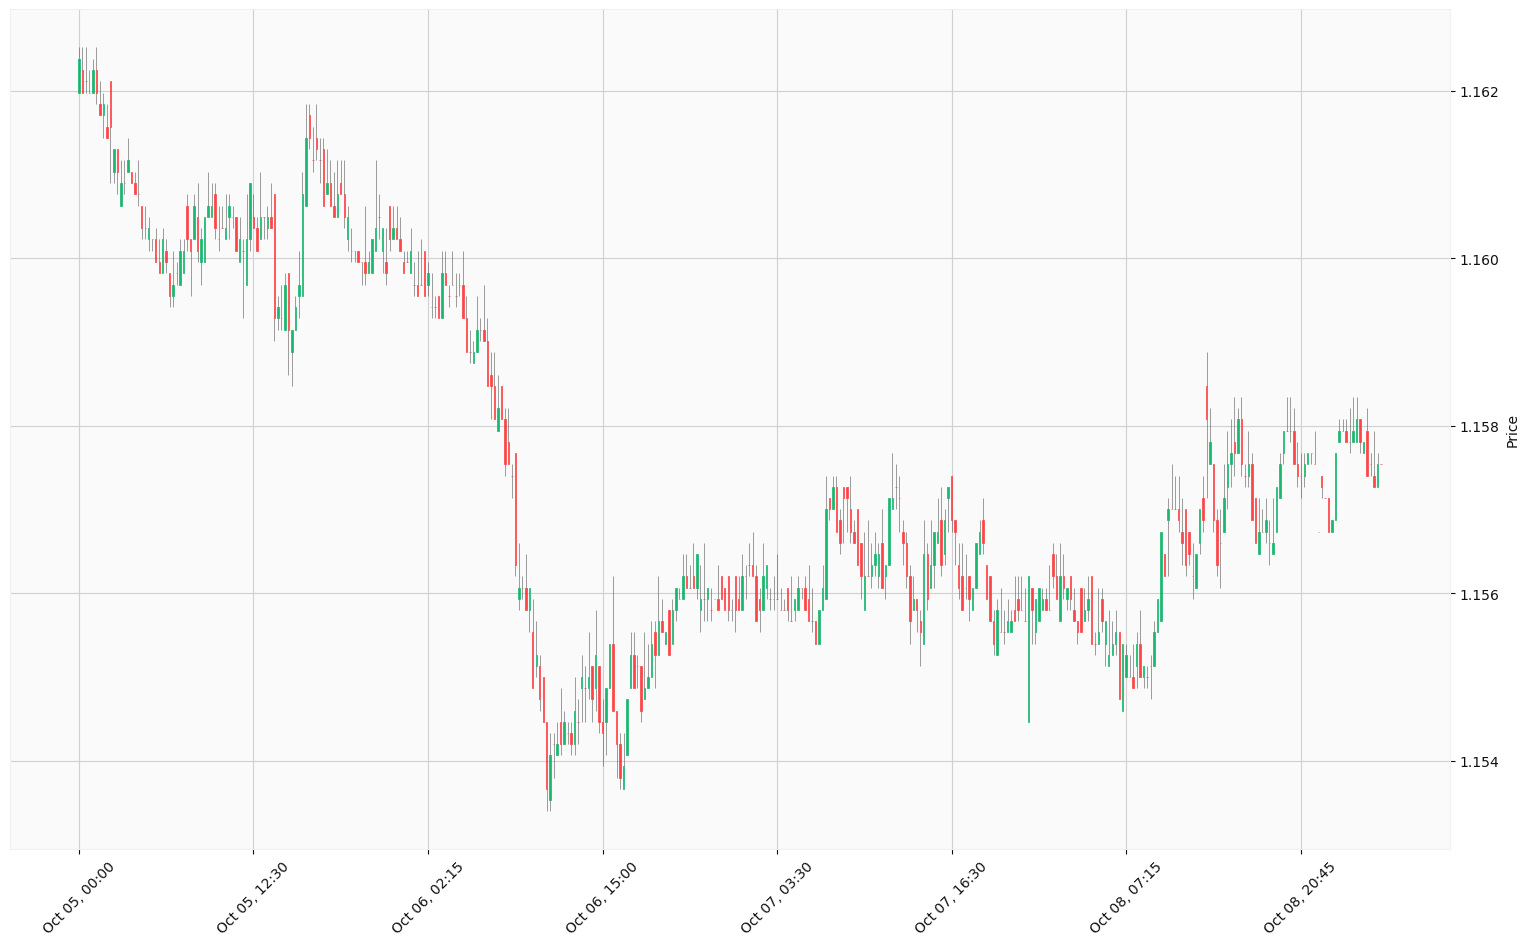

In [4]:
mpf.plot(data, type='candle', style='yahoo', figsize=(20, 12))

In [7]:
data = pd.DataFrame()
data = data.ta.ticker('aapl', period='10d', interval='15m')

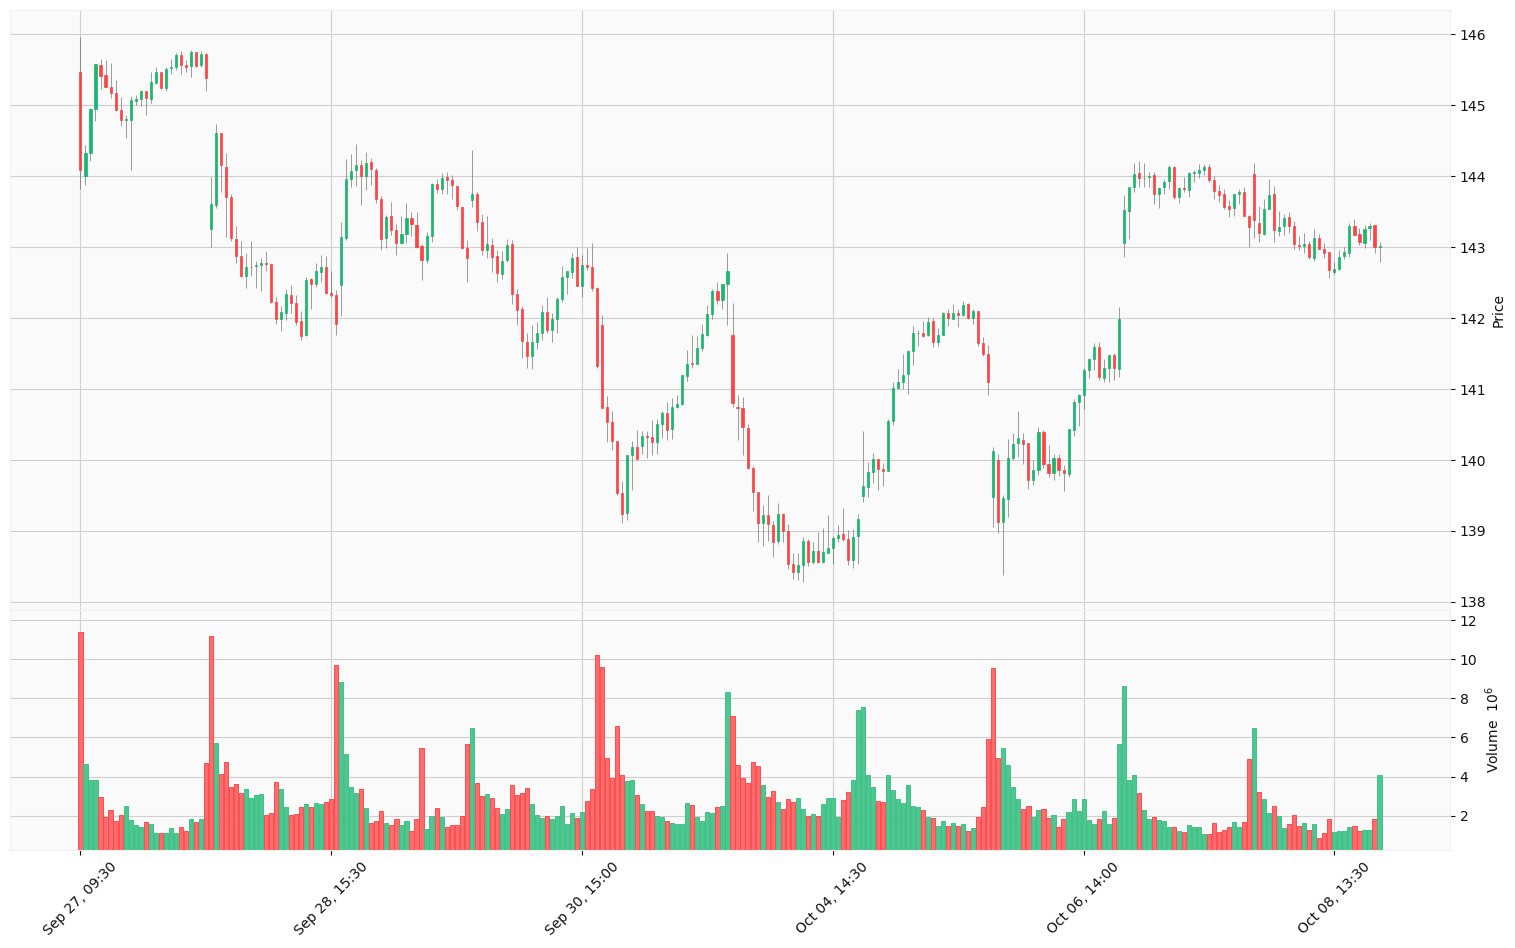

In [8]:
mpf.plot(data, type='candle', style='yahoo', figsize=(20, 12), volume=True)

https://github.com/twopirllc/pandas-ta#candles-64

In [9]:
data.copy().ta.cdl_pattern(name='all').columns

[X] Please install TA-Lib to use 2crows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)
[X] Please install TA-Lib to use 3inside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3linestrike. (pip install TA-Lib)
[X] Please install TA-Lib to use 3outside. (pip install TA-Lib)
[X] Please install TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use abandonedbaby. (pip install TA-Lib)
[X] Please install TA-Lib to use advanceblock. (pip install TA-Lib)
[X] Please install TA-Lib to use belthold. (pip install TA-Lib)
[X] Please install TA-Lib to use breakaway. (pip install TA-Lib)
[X] Please install TA-Lib to use closingmarubozu. (pip install TA-Lib)
[X] Please install TA-Lib to use concealbabyswall. (pip install TA-Lib)
[X] Please install TA-Lib to use counterattack. (pip install TA-Lib)
[X] Please install TA-Lib to use darkcloudcover. (pip instal

Index(['CDL_DOJI_10_0.1', 'CDL_INSIDE'], dtype='object')

In [10]:
df = data.copy()
df.ta.cdl_pattern(name='hammer',append=True)
df.CDL_HAMMER

[X] Please install TA-Lib to use hammer. (pip install TA-Lib)


AttributeError: 'DataFrame' object has no attribute 'CDL_HAMMER'

In [11]:
df['mark_position'] = df['Low'] * 0.99

In [12]:
marks = ['^' if x == 100 else '' for x in df['CDL_HAMMER']]
cdl_plot = mpf.make_addplot(df['mark_position'],type='scatter',marker=marks)

KeyError: 'CDL_HAMMER'

In [13]:
mpf.plot(data,addplot=cdl_plot ,type='candle',style='yahoo',figsize=(14,8),volume=True)

NameError: name 'cdl_plot' is not defined

In [14]:
buy_signal = ['morningstar','hammer','3whitesoldiers']
sell_signal = ['eveningstar','shootingstar','3blackcrows']

all_signal = buy_signal+sell_signal

In [15]:
df = data.copy()
df.ta.cdl_pattern(name=all_signal,append=True)
df.columns

[X] Please install TA-Lib to use morningstar. (pip install TA-Lib)
[X] Please install TA-Lib to use hammer. (pip install TA-Lib)
[X] Please install TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[X] Please install TA-Lib to use eveningstar. (pip install TA-Lib)
[X] Please install TA-Lib to use shootingstar. (pip install TA-Lib)
[X] Please install TA-Lib to use 3blackcrows. (pip install TA-Lib)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [16]:
df.loc[(df.iloc[:,-4]!=0 )| (df.iloc[:,-5]!=0) | (df.iloc[:,-6]!=0)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-09-27 09:30:00-04:00,145.470001,145.960007,143.820999,144.080002,11395454,0,0
2021-09-27 09:45:00-04:00,144.000000,144.429993,143.869995,144.319000,4657196,0,0
2021-09-27 10:00:00-04:00,144.330002,144.960007,144.210007,144.945007,3818154,0,0
2021-09-27 10:15:00-04:00,144.940002,145.580002,144.770004,145.574997,3838682,0,0
2021-09-27 10:30:00-04:00,145.570007,145.654999,145.220001,145.410004,2942556,0,0
...,...,...,...,...,...,...,...
2021-10-08 14:45:00-04:00,143.179993,143.259995,143.029999,143.065002,1229316,0,0
2021-10-08 15:00:00-04:00,143.060104,143.304993,142.990005,143.250000,1243535,0,0
2021-10-08 15:15:00-04:00,143.259903,143.339996,143.093094,143.300797,1281544,0,0


In [17]:
df.loc[(df.iloc[:,-6]!=0 )| (df.iloc[:,-5]!=0) | (df.iloc[:,-4]!=0), 'signal'] = 'buy'
df.loc[(df.iloc[:,-4]!=0 )| (df.iloc[:,-3]!=0) | (df.iloc[:,-2]!=0), 'signal'] = 'sell'

In [18]:
df.loc[df['signal'] == 'buy', 'mark_price'] = df['Low'] *0.99
df.loc[df['signal'] == 'sell','mark_price']  = df['High'] *1.01

In [19]:
marks = ['^' if x == 'buy' else 'v' if x == 'sell' else '' for x in df['signal']]
color = ['g' if x == 'buy' else 'r' if x == 'sell' else 'b' for x in df['signal']]
cdl_plot = mpf.make_addplot(df['mark_price'],type='scatter',marker=marks,color=color)

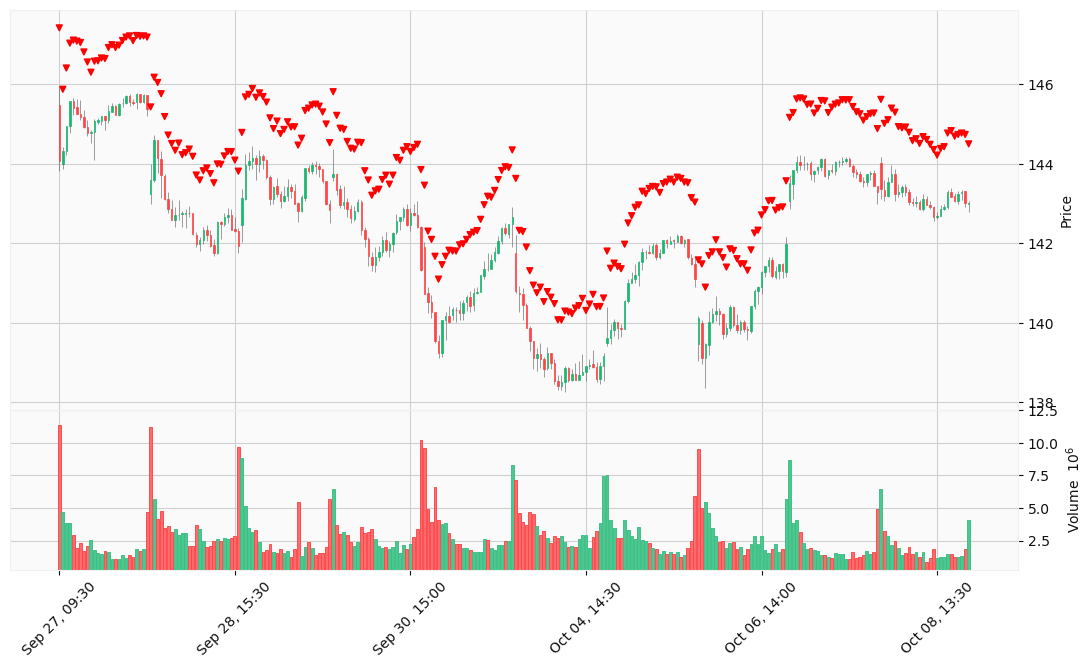

In [20]:
mpf.plot(data,addplot=cdl_plot ,type='candle',style='yahoo',figsize=(14,8),volume=True)